In [14]:
import pandas as pd 
import numpy as np
import nltk 
import re
import gensim
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
import datetime
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


In [ ]:
# to extract txt files for each review, run the following code for each pro/con column for each company
# for index, r in pros_df.iterrows():
#         id=index
#         pro=r['pro']
#         fname= 'pro' +'_'+str(id)+'.txt'
#         corpusfile=open('topic_modelling_pros_data_apple/'+'/'+fname,'a')
#         corpusfile.write(str(pro))
#         corpusfile.close()

In [83]:
def topic_modelling(corpus):
    stop_list = nltk.corpus.stopwords.words('english')
    stop_list.extend(["company","ibm","oracle","apple","microsoft","google", 'pros', 'cons'])

    fids = corpus.fileids()
    docs1 = []
    for fid in fids:
        doc_raw = corpus.raw(fid)
        doc = nltk.word_tokenize(doc_raw)
        docs1.append(doc)
    nouns = []
    pos_tag = [nltk.pos_tag(doc) for doc in docs1]
    for doc in pos_tag: 
        document = []
        for w in doc: 
            if w[1] == 'NN' or w[1] == "NNS": 
                document.append(w[0])
        nouns.append(document)
    docs2 = [[w.lower() for w in doc] for doc in nouns]
    docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
    reviews_docs = [[w for w in doc if w not in stop_list] for doc in docs3]


    dictionary = gensim.corpora.Dictionary(reviews_docs)
    vecs1 = [dictionary.doc2bow(doc) for doc in reviews_docs]
    tfidf = gensim.models.TfidfModel(vecs1)
    reviews_vecs = [tfidf[vec] for vec in vecs1]


    reviews_lda = gensim.models.ldamodel.LdaModel(corpus=reviews_vecs, id2word=dictionary, num_topics=3)
    topics = reviews_lda.show_topics(3, 20)

    perplex= reviews_lda.log_perplexity(reviews_vecs, total_docs=None)
    # print('\nPerplexity for LDAModel: ', perplex)
    coherence_model_lda = CoherenceModel(model=reviews_lda, texts=reviews_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    # print('\nCoherence Score LDAModel: ', coherence_lda)

    topics_split = []
    for topic in range(0,3):
        split = topics[topic][1].split(" + ")
        topics_split.append(split)

    # word_split = []
    # for topic in topics_split: 
    #     word_list = []
    #     for word in topic:
    #         split = word.split("*")
    #         word_list.append(split[1])
    #     word_split.append(word_list)
    # word_split_df = pd.DataFrame(word_split)
    # word_split_df = word_split_df.T

    topic_split_df = pd.DataFrame(topics_split).T
    for i in range(3):
        word_prob_df = topic_split_df[i].str.split("*", n = 1, expand = True)
        topic_split_df["probability-" + str(i)]= word_prob_df[0]
        topic_split_df["word-" + str(i)]= word_prob_df[1]

    # word_split_df['company'] = company 
    # word_split_df['pro/con'] = pro_or_con
    # vis = pyLDAvis.gensim.prepare(topic_model=reviews_lda, corpus=reviews_vecs, dictionary=dictionary)

    return topic_split_df, coherence_lda, perplex 

In [84]:
apple_pro_df, apple_pro_coherence, apple_pro_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_apple/', '.+\.txt'))
apple_con_df, apple_con_coherence, apple_con_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_apple/', '.+\.txt'))
oracle_pro_df, oracle_pro_coherence, oracle_pro_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_oracle/', '.+\.txt'))
oracle_con_df, oracle_con_coherence, oracle_con_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_oracle/', '.+\.txt'))
google_pro_df, google_pro_coherence, google_pro_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_google/', '.+\.txt'))
google_con_df, google_con_coherence, google_con_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_google/', '.+\.txt'))
ibm_pro_df, ibm_pro_coherence, ibm_pro_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_IBM/', '.+\.txt'))
ibm_con_df, ibm_con_coherence, ibm_con_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_IBM/', '.+\.txt'))
microsoft_pro_df, microsoft_pro_coherence, microsoft_pro_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_microsoft/', '.+\.txt'))
microsoft_con_df, microsoft_con_coherence, microsoft_con_perplexity = topic_modelling(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_microsoft/', '.+\.txt'))


<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: DeprecationWarning: invalid escape sequence '\.'
<>:10: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: Dep

In [85]:
frames = [apple_pro_df, apple_con_df,oracle_pro_df, oracle_con_df,google_pro_df, google_con_df,ibm_pro_df, ibm_con_df,microsoft_pro_df, microsoft_con_df]
result = pd.concat(frames, keys = ['apple_pro', 'apple_con', 'oracle_pro', 'oracle_con', 'google_pro', 'google_con', 'ibm_pro', 'ibm_con', 'microsoft_pro', 'microsoft_con'])
result.to_csv('combined_topic_modelling_output_final.csv')


In [86]:
print(apple_pro_coherence)
print(apple_con_coherence)
print(oracle_pro_coherence)
print(oracle_con_coherence)
print(google_pro_coherence)
print(google_con_coherence)
print(ibm_pro_coherence)
print(ibm_con_coherence)
print(microsoft_pro_coherence)
print(microsoft_con_coherence)

average = (apple_pro_coherence + apple_con_coherence + oracle_pro_coherence + oracle_con_coherence + google_pro_coherence + google_con_coherence + ibm_pro_coherence + ibm_con_coherence+ microsoft_pro_coherence + microsoft_con_coherence)/10
print('average = ', str(average) )

0.39710667324090637
0.6378649320347226
0.3511660610431289
0.5874273517933937
0.44462742954903733
0.5797205203630256
0.41312722682816955
0.6037326069890906
0.4062030967803089
0.5711844523971417
average =  0.4992160351018925


In [19]:
print(apple_pro_perplexity)
print(apple_con_perplexity)
print(oracle_pro_perplexity)
print(oracle_con_perplexity)
print(google_pro_perplexity)
print(google_con_perplexity)
print(ibm_pro_perplexity)
print(ibm_con_perplexity)
print(microsoft_pro_perplexity)
print(microsoft_con_perplexity)

average = round((apple_pro_perplexity + apple_con_perplexity + oracle_pro_perplexity + oracle_con_perplexity + google_pro_perplexity + google_con_perplexity + ibm_pro_perplexity + ibm_con_perplexity+ microsoft_pro_perplexity + microsoft_con_perplexity)/10, 5)
print('average = ', str(average) )

-6.944746165125588
-7.707708190425234
-6.805071053556523
-7.656239133479381
-6.856764168931614
-7.5626277932254045
-6.965359251640618
-7.778764515211983
-7.069071749711774
-7.9269711063186294
average =  -7.32733


<h1> optimal number of topics <h1>

In [20]:
def optimal_topics(corpus):
    model_list = []
    coherence_values = []
    model_topics = []

    for num_topics in range(2, 10):
        stop_list = nltk.corpus.stopwords.words('english')
        stop_list.extend(["company","ibm","oracle","apple","microsoft","google"])

        fids = corpus.fileids()
        docs1 = []
        for fid in fids:
            doc_raw = corpus.raw(fid)
            doc = nltk.word_tokenize(doc_raw)
            docs1.append(doc)
        nouns = []
        pos_tag = [nltk.pos_tag(doc) for doc in docs1]
        for doc in pos_tag: 
            document = []
            for w in doc: 
                if w[1] == 'NN' or w[1] == "NNS": 
                    document.append(w[0])
            nouns.append(document)
        docs2 = [[w.lower() for w in doc] for doc in nouns]
        docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
        reviews_docs = [[w for w in doc if w not in stop_list] for doc in docs3]

        dictionary = gensim.corpora.Dictionary(reviews_docs)
        vecs1 = [dictionary.doc2bow(doc) for doc in reviews_docs]
        tfidf = gensim.models.TfidfModel(vecs1)
        reviews_vecs = [tfidf[vec] for vec in vecs1]
        
        reviews_lda_x = gensim.models.ldamodel.LdaModel(corpus=reviews_vecs, id2word=dictionary, num_topics=num_topics)
        coherencemodel = CoherenceModel(model=reviews_lda_x, texts=reviews_docs, dictionary=dictionary, coherence='c_v')
        model_topics.append(num_topics)
        model_list.append(reviews_lda_x)
        coherence_values.append(coherencemodel.get_coherence())
        # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

    print(datetime.datetime.now())

    return coherence_values

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: DeprecationWarning: invalid escape sequence '\.'
<>:10: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: Dep

2023-04-12 14:19:28.549091
2023-04-12 14:21:54.174319
2023-04-12 14:24:15.621400
2023-04-12 14:27:26.354892
2023-04-12 14:28:43.252623
2023-04-12 14:30:05.357967
2023-04-12 14:32:22.449028
2023-04-12 14:35:19.290069
2023-04-12 14:39:53.880846
2023-04-12 14:45:24.435888


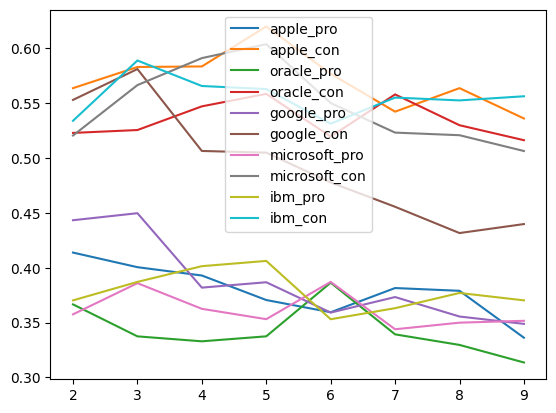

In [71]:
apple_pro_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_apple/', '.+\.txt'))
apple_con_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_apple/', '.+\.txt'))
oracle_pro_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_oracle/', '.+\.txt'))
oracle_con_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_oracle/', '.+\.txt'))
google_pro_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_google/', '.+\.txt'))
google_con_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_google/', '.+\.txt'))
microsoft_pro_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_microsoft/', '.+\.txt'))
microsoft_con_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_microsoft/', '.+\.txt'))
ibm_pro_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_IBM/', '.+\.txt'))
ibm_con_y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_IBM/', '.+\.txt'))


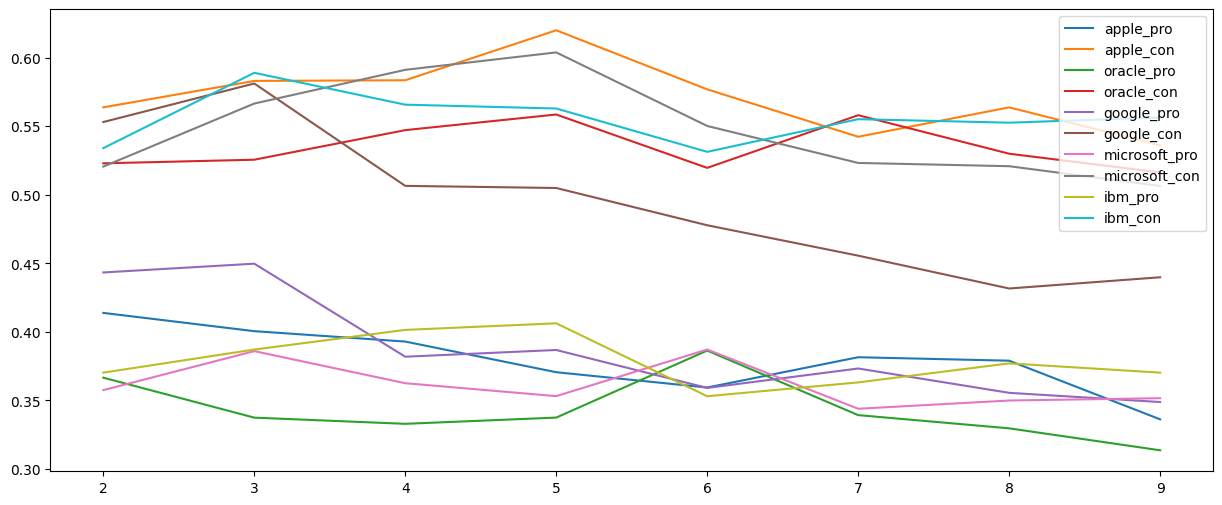

In [82]:
x = range(2,10)

plt.figure(figsize=(15,6))
plt.plot(x, apple_pro_y, label='apple_pro')
plt.plot(x, apple_con_y, label='apple_con')
plt.plot(x, oracle_pro_y, label = 'oracle_pro')
plt.plot(x, oracle_con_y, label = 'oracle_con')
plt.plot(x, google_pro_y, label = 'google_pro')
plt.plot(x, google_con_y, label = 'google_con')
plt.plot(x, microsoft_pro_y, label = 'microsoft_pro')
plt.plot(x, microsoft_con_y, label = 'microsoft_con')
plt.plot(x, ibm_pro_y, label = 'ibm_pro')
plt.plot(x, ibm_con_y, label = 'ibm_con')

plt.legend(loc= 'upper right')
plt.show()

apple_pro


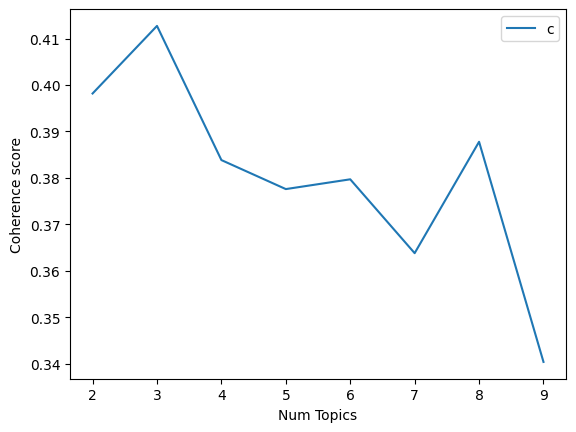

In [22]:
print('apple_pro')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/1184085703.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_apple/', '.+\.txt'))


2023-04-04 11:43:58.896573
apple_con


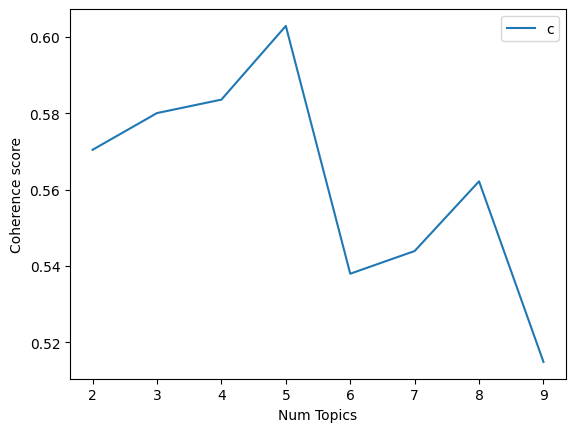

In [23]:
y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_apple/', '.+\.txt'))
print('apple_con')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/4180460547.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_oracle/', '.+\.txt'))


2023-04-04 11:46:17.006374
oracle_pro


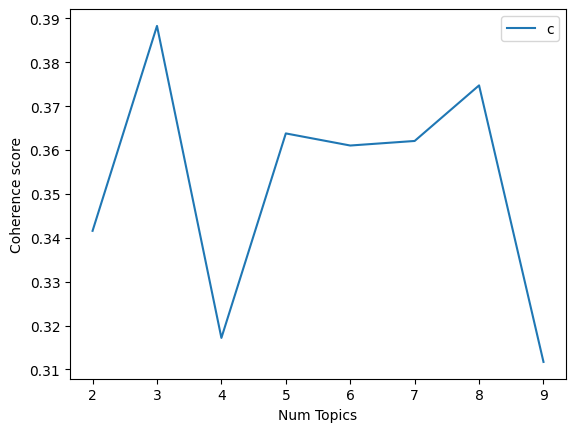

In [24]:
y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_oracle/', '.+\.txt'))
print('oracle_pro')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/2587973722.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_oracle/', '.+\.txt'))


2023-04-04 11:49:22.821492
oracle_con


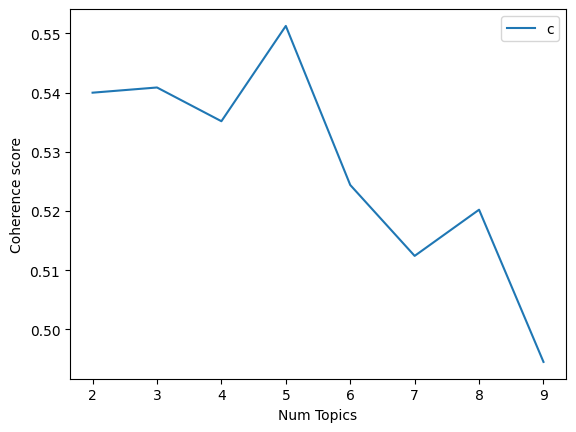

In [25]:
print('oracle_con')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/1510868441.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_google/', '.+\.txt'))


2023-04-04 11:50:36.125272
google_pro


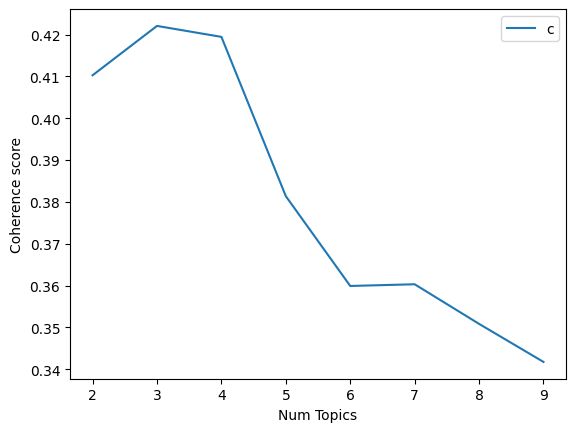

In [26]:

print('google_pro')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/126653264.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_google/', '.+\.txt'))


2023-04-04 11:51:56.757646
google_con


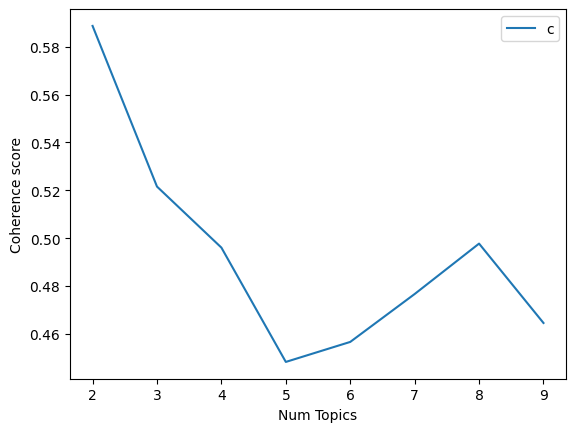

In [27]:

print('google_con')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/1614867049.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_microsoft/', '.+\.txt'))


2023-04-04 11:54:05.862985
microsoft_pro


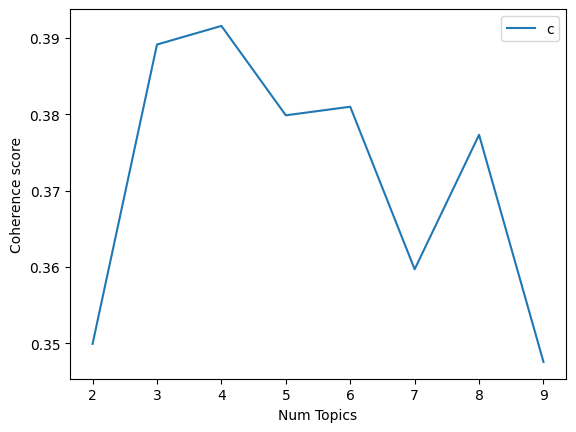

In [28]:
print('microsoft_pro')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/2521773344.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_microsoft/', '.+\.txt'))


2023-04-04 11:56:55.350553
microsoft_con


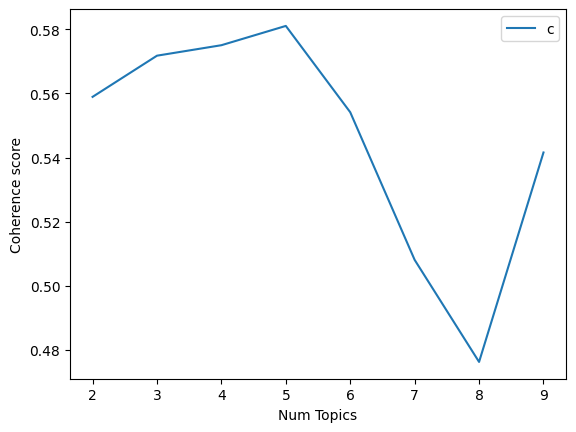

In [29]:

print('microsoft_con')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/3932931121.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_IBM/', '.+\.txt'))


2023-04-04 12:01:24.898894
ibm_pro


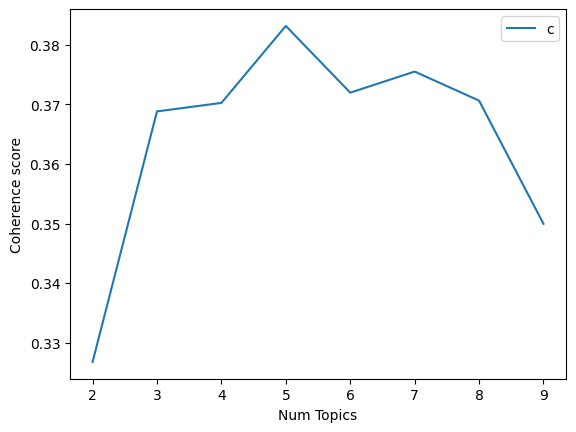

In [30]:

print('ibm_pro')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/500599428.py:1: DeprecationWarning: invalid escape sequence '\.'
  y = optimal_topics(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_IBM/', '.+\.txt'))


2023-04-04 12:06:56.395079
ibm_con


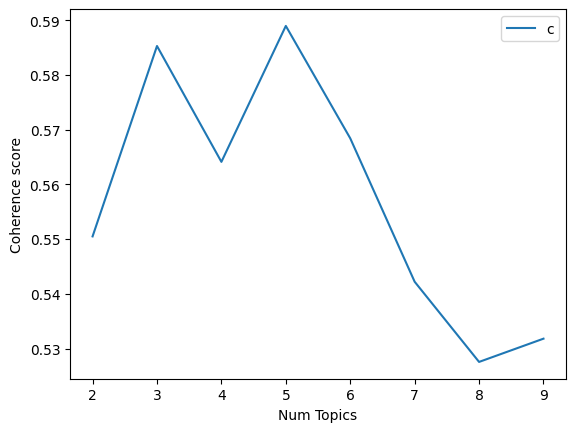

In [31]:

print('ibm_con')
plt.plot(range(2,10), y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<h1> adding bigram <h1>

In [67]:
def topic_modelling_bigram(corpus):
    stop_list = nltk.corpus.stopwords.words('english')
    stop_list.extend(["company","ibm","oracle","apple","microsoft","google"])

    fids = corpus.fileids()
    docs1 = []
    for fid in fids:
        doc_raw = corpus.raw(fid)
        doc = nltk.word_tokenize(doc_raw)
        docs1.append(doc)
    nouns = []
    pos_tag = [nltk.pos_tag(doc) for doc in docs1]
    for doc in pos_tag: 
        document = []
        for w in doc: 
            if w[1] == 'NN' or w[1] == "NNS": 
                document.append(w[0])
        nouns.append(document)
    docs2 = [[w.lower() for w in doc] for doc in nouns]
    docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
    reviews_docs = [[w for w in doc if w not in stop_list] for doc in docs3]

    bigram = gensim.models.Phrases(reviews_docs)
    for idx in range(len(reviews_docs)):
        for token in bigram[reviews_docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                reviews_docs[idx].append(token)
                

    dictionary = gensim.corpora.Dictionary(reviews_docs)
    vecs1 = [dictionary.doc2bow(doc) for doc in reviews_docs]
    tfidf = gensim.models.TfidfModel(vecs1)
    reviews_vecs = [tfidf[vec] for vec in vecs1]
  
    reviews_lda = gensim.models.ldamodel.LdaModel(corpus=reviews_vecs, id2word=dictionary, num_topics=3)
    topics = reviews_lda.show_topics(3, 20)

    perplex= reviews_lda.log_perplexity(reviews_vecs, total_docs=None)
    # print('\nPerplexity for LDAModel: ', perplex)
    coherence_model_lda = CoherenceModel(model=reviews_lda, texts=reviews_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    # print('\nCoherence Score LDAModel: ', coherence_lda)

    topics_split = []
    for topic in range(0,3):
        split = topics[topic][1].split(" + ")
        topics_split.append(split)

    # word_split = []
    # for topic in topics_split: 
    #     word_list = []
    #     for word in topic:
    #         split = word.split("*")
    #         word_list.append(split[1])
    #     word_split.append(word_list)
    # word_split_df = pd.DataFrame(word_split)
    # word_split_df = word_split_df.T

    topic_split_df = pd.DataFrame(topics_split).T
    for i in range(3):
        word_prob_df = topic_split_df[i].str.split("*", n = 1, expand = True)
        topic_split_df["probability-" + str(i)]= word_prob_df[0]
        topic_split_df["word-" + str(i)]= word_prob_df[1]

    # word_split_df['company'] = company 
    # word_split_df['pro/con'] = pro_or_con
    # vis = pyLDAvis.gensim.prepare(topic_model=reviews_lda, corpus=reviews_vecs, dictionary=dictionary)

    return topic_split_df, coherence_lda, perplex 

In [69]:
apple_pro_df, apple_pro_coherence, apple_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_apple/', '.+\.txt'))
apple_con_df, apple_con_coherence, apple_con_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_apple/', '.+\.txt'))
oracle_pro_df, oracle_pro_coherence, oracle_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_oracle/', '.+\.txt'))
oracle_con_df, oracle_con_coherence, oracle_con_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_oracle/', '.+\.txt'))
google_pro_df, google_pro_coherence, google_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_google/', '.+\.txt'))
google_con_df, google_con_coherence, google_con_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_google/', '.+\.txt'))
ibm_pro_df, ibm_pro_coherence, ibm_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_IBM/', '.+\.txt'))
ibm_con_df, ibm_con_coherence, ibm_con_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_IBM/', '.+\.txt'))
microsoft_pro_df, microsoft_pro_coherence, microsoft_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_microsoft/', '.+\.txt'))
microsoft_con_df, microsoft_con_coherence, microsoft_con_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_cons_data_microsoft/', '.+\.txt'))


<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: DeprecationWarning: invalid escape sequence '\.'
<>:10: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:5: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:8: DeprecationWarning: invalid escape sequence '\.'
<>:9: Dep

In [47]:
frames = [apple_pro_df, apple_con_df,oracle_pro_df, oracle_con_df,google_pro_df, google_con_df,ibm_pro_df, ibm_con_df,microsoft_pro_df, microsoft_con_df]
result = pd.concat(frames, keys = ['apple_pro', 'apple_con', 'oracle_pro', 'oracle_con', 'google_pro', 'google_con', 'ibm_pro', 'ibm_con', 'microsoft_pro', 'microsoft_con'])
result.to_csv('combined_topic_modelling_output_bigram.csv')

In [68]:
apple_pro_df, apple_pro_coherence, apple_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_apple/', '.+\.txt'))

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
/var/folders/ql/vkrkstr5223_6_sys1t5rpn00000gn/T/ipykernel_74977/1422080478.py:1: DeprecationWarning: invalid escape sequence '\.'
  apple_pro_df, apple_pro_coherence, apple_pro_perplexity = topic_modelling_bigram(nltk.corpus.PlaintextCorpusReader('./topic_modelling_pros_data_apple/', '.+\.txt'))


In [94]:
bigram_topics = pd.read_csv('combined_topic_modelling_output_bigram.csv')
bigram_topics.rename( columns={'Unnamed: 0':'key'}, inplace=True )

bigram_topics[bigram_topics['key'] == "apple_con"]

,key,Unnamed: 1,0,1,2,probability-0,word-0,probability-1,word-1,probability-2,word-2
20,apple_con,0,"0.021*""customers""","0.032*""hours""","0.037*""work""",0.021,"""customers""",0.032,"""hours""",0.037,"""work"""
21,apple_con,1,"0.019*""people""","0.026*""none""","0.033*""balance""",0.019,"""people""",0.026,"""none""",0.033,"""balance"""
22,apple_con,2,"0.013*""employees""","0.022*""nothing""","0.030*""life""",0.013,"""employees""",0.022,"""nothing""",0.030,"""life"""
23,apple_con,3,"0.013*""schedule""","0.021*""times""","0.030*""cons""",0.013,"""schedule""",0.021,"""times""",0.030,"""cons"""
24,apple_con,4,"0.013*""pay""","0.015*""weekends""","0.029*""time""",0.013,"""pay""",0.015,"""weekends""",0.029,"""time"""
25,apple_con,5,"0.013*""growth""","0.011*""home""","0.024*""job""",0.013,"""growth""",0.011,"""home""",0.024,"""job"""
26,apple_con,6,"0.012*""management""","0.010*""everything""","0.022*""management""",0.012,"""management""",0.010,"""everything""",0.022,"""management"""
27,apple_con,7,"0.011*""managers""","0.010*""lot""","0.017*""environment""",0.011,"""managers""",0.010,"""lot""",0.017,"""environment"""
28,apple_con,8,"0.010*""opportunities""","0.010*""bit""","0.016*""hours""",0.010,"""opportunities""",0.010,"""bit""",0.016,"""hours"""
29,apple_con,9,"0.010*""career""","0.009*""experience""","0.012*""holidays""",0.010,"""career""",0.009,"""experience""",0.012,"""holidays"""


In [114]:
microsoft_con_df

,0,1,2,probability-0,word-0,probability-1,word-1,probability-2,word-2
0,"0.027*""work""","0.018*""management""","0.016*""nothing""",0.027,"""work""",0.018,"""management""",0.016,"""nothing"""
1,"0.025*""balance""","0.018*""time""","0.015*""growth""",0.025,"""balance""",0.018,"""time""",0.015,"""growth"""
2,"0.018*""people""","0.015*""politics""","0.013*""review""",0.018,"""people""",0.015,"""politics""",0.013,"""review"""
3,"0.018*""life""","0.015*""hours""","0.013*""companies""",0.018,"""life""",0.015,"""hours""",0.013,"""companies"""
4,"0.014*""things""","0.014*""team""","0.011*""bit""",0.014,"""things""",0.014,"""team""",0.011,"""bit"""
5,"0.012*""times""","0.014*""culture""","0.010*""compensation""",0.012,"""times""",0.014,"""culture""",0.010,"""compensation"""
6,"0.011*""lot""","0.014*""none""","0.010*""pay""",0.011,"""lot""",0.014,"""none""",0.010,"""pay"""
7,"0.011*""place""","0.012*""environment""","0.010*""career""",0.011,"""place""",0.012,"""environment""",0.010,"""career"""
8,"0.010*""teams""","0.010*""employees""","0.010*""processes""",0.010,"""teams""",0.010,"""employees""",0.010,"""processes"""
9,"0.010*""organization""","0.010*""opportunities""","0.009*""system""",0.010,"""organization""",0.010,"""opportunities""",0.009,"""system"""
